In [38]:
using Plots
using Statistics
using JLD2
using Base.Threads
using StatsPlots
using ITensors
using Distributions, Random
using StatsBase:kldivergence
using StatsBase:sample
include("../utils.jl");

In [40]:
mps0 = load_mps_from_h5("mps0_new.h5","mps0_new");
mps1 = load_mps_from_h5("mps1_new.h5","mps1_new");

In [41]:
@load "X_train_ecg.jld2"

2-element Vector{Symbol}:
 :X_train_scaled
 :y_train

In [42]:
class_0_idxs = findall(x -> x .== 0, y_train);
class_1_idxs = findall(x -> x .== 1, y_train);
class_0_samples = X_train_scaled[class_0_idxs, :]
class_1_samples = X_train_scaled[class_1_idxs, :];

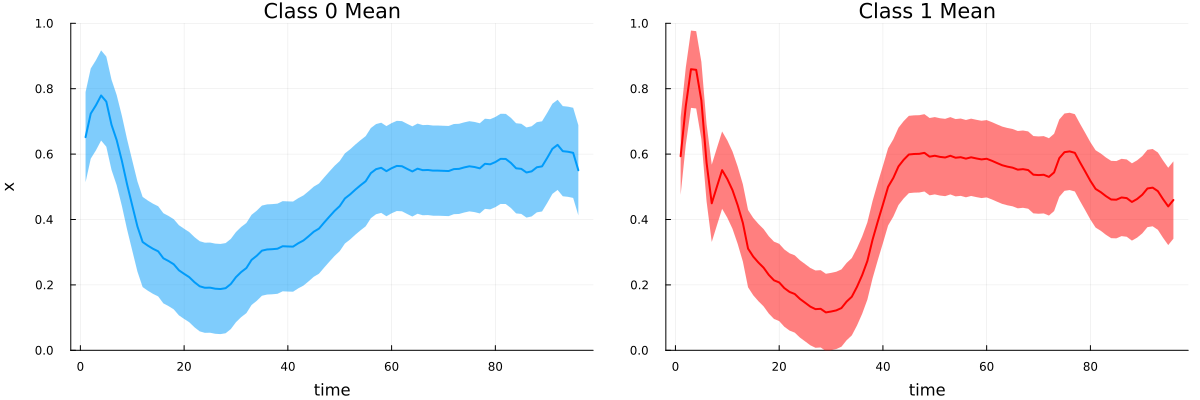

In [27]:
p1 = plot(mean(class_0_samples, dims=1)[1,:], ribbon=std(class_0_samples, dims=1),label="", xlabel="time", ylabel="x", title="Class 0 Mean", lw=2, ylimits=(0,1))
p2 = plot(mean(class_1_samples, dims=1)[1,:], ribbon=std(class_1_samples, dims=1),label="", xlabel="time", title="Class 1 Mean", lw=2, c=:red, ylimits=(0,1 ))
plot(p1, p2, size=(1200, 400), bottom_margin=5mm, left_margin=5mm)

In [43]:
mps0_copy = deepcopy(mps0);
mps1_copy = deepcopy(mps1);

In [36]:
samps0 = Matrix{Float64}(undef, 5000, 96);
@threads for i in 1:5000
    samp0 = generate_sample(deepcopy(mps0_copy); dx=1.0)
    samps0[i, :] = samp0
end

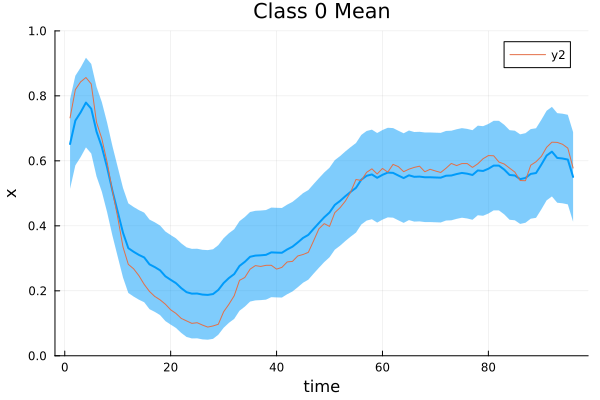

In [37]:
p1 = plot(mean(class_0_samples, dims=1)[1,:], ribbon=std(class_0_samples, dims=1),label="", xlabel="time", ylabel="x", title="Class 0 Mean", lw=2, ylimits=(0,1))
p2 = plot!(mean(samps0, dims=1)[1,:])

In [ ]:
plot(mean(samps))

In [29]:
samps0 = Matrix{Float64}(undef, 5000, 96);
samps1 = Matrix{Float64}(undef, 5000, 96);
@threads for i in 1:5000
    samp0 = generate_sample(deepcopy(mps0_copy); dx=1.0)
    samp1 = generate_sample(deepcopy(mps1_copy); dx=1.0)
    samps0[i, :] = samp0
    samps1[i, :] = samp1
end

CompositeException: TaskFailedException

    nested task error: InterruptException:
    Stacktrace:
      [1] getproperty(F::LinearAlgebra.QRCompactWY{ComplexF64, Matrix{ComplexF64}, Matrix{ComplexF64}}, d::Symbol)
        @ LinearAlgebra /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/LinearAlgebra/src/qr.jl:473
      [2] iterate
        @ /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/LinearAlgebra/src/qr.jl:131 [inlined]
      [3] indexed_iterate
        @ ./tuple.jl:95 [inlined]
      [4] qx(qx::typeof(qr), T::NDTensors.DenseTensor{ComplexF64, 2, Tuple{Index{Int64}, Index{Int64}}, NDTensors.Dense{ComplexF64, Vector{ComplexF64}}})
        @ NDTensors ~/.julia/packages/NDTensors/VOLro/src/linearalgebra/linearalgebra.jl:332
      [5] #qr#97
        @ ~/.julia/packages/NDTensors/VOLro/src/linearalgebra/linearalgebra.jl:318 [inlined]
      [6] qx(qx::typeof(qr), A::ITensor, Linds::Vector{Index{Int64}}, Rinds::Vector{Index{Int64}}; tags::TagSet, positive::Bool)
        @ ITensors ~/.julia/packages/ITensors/fBALV/src/tensor_operations/matrix_decomposition.jl:513
      [7] qx
        @ ~/.julia/packages/ITensors/fBALV/src/tensor_operations/matrix_decomposition.jl:488 [inlined]
      [8] #qr#329
        @ ~/.julia/packages/ITensors/fBALV/src/tensor_operations/matrix_decomposition.jl:474 [inlined]
      [9] qr(A::ITensor, Linds::Vector{Index{Int64}}; kwargs::@Kwargs{tags::TagSet, positive::Bool})
        @ ITensors ~/.julia/packages/ITensors/fBALV/src/tensor_operations/matrix_decomposition.jl:458
     [10] qr
        @ ~/.julia/packages/ITensors/fBALV/src/tensor_operations/matrix_decomposition.jl:458 [inlined]
     [11] factorize_qr(A::ITensor, Linds::Vector{Index{Int64}}; ortho::String, tags::TagSet, positive::Bool)
        @ ITensors ~/.julia/packages/ITensors/fBALV/src/tensor_operations/matrix_decomposition.jl:566
     [12] factorize_qr
        @ ~/.julia/packages/ITensors/fBALV/src/tensor_operations/matrix_decomposition.jl:564 [inlined]
     [13] factorize(A::ITensor, Linds::Vector{Index{Int64}}; mindim::Nothing, maxdim::Nothing, cutoff::Nothing, ortho::Nothing, tags::TagSet, plev::Nothing, which_decomp::Nothing, eigen_perturbation::Nothing, svd_alg::Nothing, use_absolute_cutoff::Nothing, use_relative_cutoff::Nothing, min_blockdim::Nothing, singular_values!::Nothing, dir::Nothing)
        @ ITensors ~/.julia/packages/ITensors/fBALV/src/tensor_operations/matrix_decomposition.jl:841
     [14] orthogonalize!(M::MPS, j::Int64; maxdim::Nothing, normalize::Nothing)
        @ ITensors.ITensorMPS ~/.julia/packages/ITensors/fBALV/src/ITensorMPS/abstractmps.jl:1631
     [15] orthogonalize!
        @ ~/.julia/packages/ITensors/fBALV/src/ITensorMPS/abstractmps.jl:1593 [inlined]
     [16] generate_sample(mps_original::MPS; dx::Float64)
        @ Main ~/Documents/QuantumInspiredML/MPS_MSE/complex-opt/Julia/optim/utils.jl:234
     [17] generate_sample
        @ ~/Documents/QuantumInspiredML/MPS_MSE/complex-opt/Julia/optim/utils.jl:227 [inlined]
     [18] macro expansion
        @ ~/Documents/QuantumInspiredML/MPS_MSE/complex-opt/Julia/optim/chi_15_ecg_trial/ecg_generative.ipynb:4 [inlined]
     [19] (::var"#481#threadsfor_fun#81"{var"#481#threadsfor_fun#80#82"{UnitRange{Int64}}})(tid::Int64; onethread::Bool)
        @ Main ./threadingconstructs.jl:215
     [20] #481#threadsfor_fun
        @ ./threadingconstructs.jl:182 [inlined]
     [21] (::Base.Threads.var"#1#2"{var"#481#threadsfor_fun#81"{var"#481#threadsfor_fun#80#82"{UnitRange{Int64}}}, Int64})()
        @ Base.Threads ./threadingconstructs.jl:154

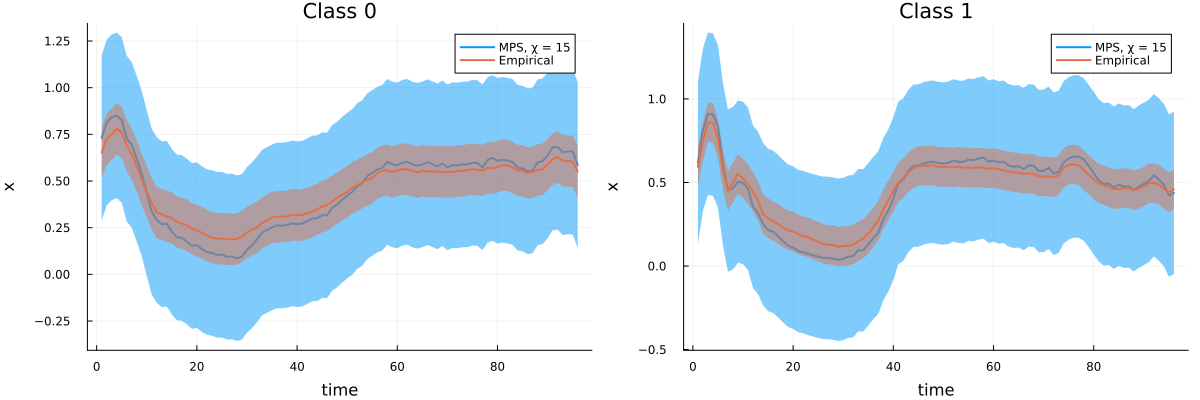

In [47]:
p = plot(mean(samps0, dims=1)[1,:], lw=2, ribbon=std(samps0, dims=1), title="Class 0", xlabel="time", ylabel="x", label="MPS, χ = 15")
plot!(mean(class_0_samples, dims=1)[1,:], lw=2, ribbon=std(class_0_samples, dims=1), label="Empirical")

p2 = plot(mean(samps1, dims=1)[1,:], lw=2, ribbon=std(samps1, dims=1), title="Class 1", xlabel="time", ylabel="x", label="MPS, χ = 15")
plot!(mean(class_1_samples, dims=1)[1,:], lw=2, ribbon=std(class_1_samples, dims=1), label="Empirical")

plot(p, p2, size=(1200,400), bottom_margin=5mm, left_margin=5mm)

In [55]:
interp_samps1000 = Matrix{Float64}(undef, 1000, 46);
@threads for i in 1:1000
    samp = interpolate_sample(deepcopy(mps1), class_1_samples[10,1:50], 51; dx=1.0);
    interp_samps1000[i, :] = samp
end

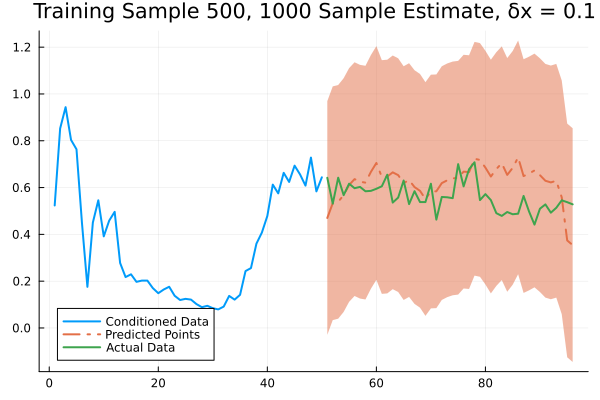

In [56]:
plot(collect(1:50), class_1_samples[10,1:50], lw=2, label="Conditioned Data", title="Training Sample 500, 1000 Sample Estimate, δx = 0.1", legend=:bottomleft)
plot!(collect(51:96), mean(interp_samps1000, dims=1)[1,:], ribbon=std(interp_samps1000, dims=1), label="Predicted Points", ls=:dashdot, lw=2)
plot!(collect(51:96), class_1_samples[10, 51:96], label="Actual Data", lw=2)

In [5]:
function compute_smape(forecasted::Vector{Float64}, actual::Vector{Float64})
    @assert length(forecasted) == length(actual) "Time series lengths do not match"
    """Compute SMAPE (Symmetric Mean Absolute Percentage Error)"""
    abs_diff = abs.(forecasted .- actual)
    sum_abs_vals = abs.(actual) .+ abs.(forecasted)
    smape = mean(200*(abs_diff/sum_abs_vals))
    return smape
    
end

compute_smape (generic function with 1 method)

In [44]:
@load "X_test_ecg.jld2"

2-element Vector{Symbol}:
 :X_test_scaled
 :y_test

In [45]:
class_0_test_idxs = findall(x -> x .== 0, y_test);
class_1_test_idxs = findall(x -> x .== 1, y_test);
class_0_test_samples = X_test_scaled[class_0_test_idxs, :]
class_1_test_samples = X_test_scaled[class_1_test_idxs, :];

In [66]:
smapes_all_c1 = []
for i in 1:size(class_1_test_samples)[1]
    # get the sample and slice into 50% conditioning and 50% testing
    ground_truth_sample = class_1_test_samples[i,1:50]
    interp_samps = Matrix{Float64}(undef, 1000, 46);
    @threads for j in 1:1000
        samp = interpolate_sample(deepcopy(mps1), ground_truth_sample, 51; dx=1.0);
        interp_samps[j, :] = samp
    end
    predicted_sample = mean(interp_samps, dims=1)[1,:]
    # compute smape between forecasted and actual
    # actual 
    ground_truth_actual = class_1_test_samples[i,51:end]
    sm = compute_smape(predicted_sample, ground_truth_actual)
    push!(smapes_all_c1, sm)
    println("Sample $i : sMAPE: $sm")
end

Sample 1 : sMAPE: 0.3848454447287769
Sample 2 : sMAPE: 0.31594670847759804
Sample 3 : sMAPE: 0.35559675708213156
Sample 4 : sMAPE: 0.45632389182632105
Sample 5 : sMAPE: 0.28736564504369677
Sample 6 : sMAPE: 0.2242655680230432
Sample 7 : sMAPE: 0.5228069789390914
Sample 8 : sMAPE: 0.46345079263447136
Sample 9 : sMAPE: 0.4622463084985264
Sample 10 : sMAPE: 0.19527747705976445
Sample 11 : sMAPE: 0.19880342853375715
Sample 12 : sMAPE: 0.4410095998871702
Sample 13 : sMAPE: 0.6922909447364186
Sample 14 : sMAPE: 0.21319465867244
Sample 15 : sMAPE: 0.18229782399456607
Sample 16 : sMAPE: 0.24915290991488787
Sample 17 : sMAPE: 0.7857535372237027
Sample 18 : sMAPE: 0.5920912510455189
Sample 19 : sMAPE: 0.38052489370051173
Sample 20 : sMAPE: 0.1595245491275075
Sample 21 : sMAPE: 0.52220697042278
Sample 22 : sMAPE: 0.23071368323698688
Sample 23 : sMAPE: 0.46376379526992484
Sample 24 : sMAPE: 0.2981974171507898
Sample 25 : sMAPE: 0.44047092038775815
Sample 26 : sMAPE: 0.49431651112326536
Sample 27 :

In [78]:
smapes_all_c0 = []
for i in 1:size(class_0_test_samples)[1]
    # get the sample and slice into 50% conditioning and 50% testing
    ground_truth_sample = class_0_test_samples[i,1:50]
    interp_samps = Matrix{Float64}(undef, 1000, 46);
    @threads for j in 1:1000
        samp = interpolate_sample(deepcopy(mps0), ground_truth_sample, 51; dx=1.0);
        interp_samps[j, :] = samp
    end
    predicted_sample = mean(interp_samps, dims=1)[1,:]
    # compute smape between forecasted and actual
    # actual 
    ground_truth_actual = class_0_test_samples[i,51:end]
    sm = compute_smape(predicted_sample, ground_truth_actual)
    push!(smapes_all_c0, sm)
    println("Sample $i : sMAPE: $sm")
end

Sample 1 : sMAPE: 0.5082119879511919
Sample 2 : sMAPE: 0.2994927573269853
Sample 3 : sMAPE: 0.7751522451369708
Sample 4 : sMAPE: 0.29596770419495544
Sample 5 : sMAPE: 0.1813656723257978
Sample 6 : sMAPE: 0.7472558758531334
Sample 7 : sMAPE: 0.5151013881627599
Sample 8 : sMAPE: 0.5873007973451865
Sample 9 : sMAPE: 0.1063941860195576
Sample 10 : sMAPE: 0.9019883830994264
Sample 11 : sMAPE: 0.21772327610839096
Sample 12 : sMAPE: 0.7020261148696181
Sample 13 : sMAPE: 0.5258982929312801
Sample 14 : sMAPE: 0.215048692994432
Sample 15 : sMAPE: 0.482621859051007
Sample 16 : sMAPE: 0.7249839507901451
Sample 17 : sMAPE: 0.3236566232546368
Sample 18 : sMAPE: 0.26701539394175106
Sample 19 : sMAPE: 0.41185220483886464
Sample 20 : sMAPE: 0.6060709582161078
Sample 21 : sMAPE: 0.18672983958273037
Sample 22 : sMAPE: 0.38573768959109367
Sample 23 : sMAPE: 0.28027590790663026
Sample 24 : sMAPE: 0.6526037577682029
Sample 25 : sMAPE: 0.405026618377349
Sample 26 : sMAPE: 0.37659943858554906
Sample 27 : sMAP

In [46]:
interp_samps1000 = Matrix{Float64}(undef, 5000, 46);
@threads for i in 1:5000
    samp = interpolate_sample(deepcopy(mps0), class_0_test_samples[9,1:50], 51; dx=1.0);
    interp_samps1000[i, :] = samp
end

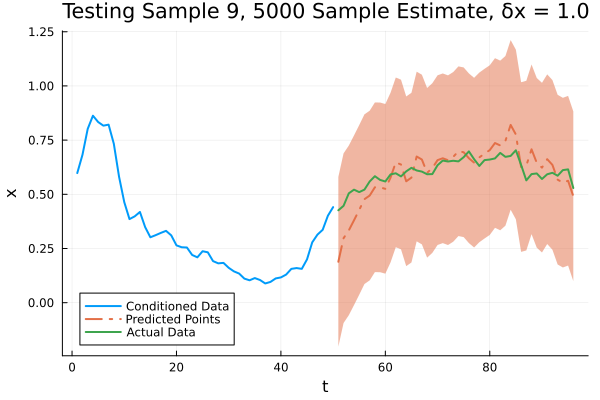

In [47]:
plot(collect(1:50), class_0_test_samples[9,1:50], lw=2, label="Conditioned Data", title="Testing Sample 9, 5000 Sample Estimate, δx = 1.0", legend=:bottomleft)
plot!(collect(51:96), mean(interp_samps1000, dims=1)[1,:], ribbon=std(interp_samps1000, dims=1), label="Predicted Points", ls=:dashdot, lw=2)
plot!(collect(51:96), class_0_test_samples[9, 51:96], label="Actual Data", lw=2)
xlabel!("t")
ylabel!("x")
#savefig("ecg200_class0_sample_9.svg")

In [126]:
interp_samps5000 = Matrix{Float64}(undef, 5000, 46);
@threads for i in 1:5000
    samp = interpolate_sample(deepcopy(mps0), class_0_test_samples[33,1:50], 51; dx=1.0);
    interp_samps5000[i, :] = samp
end

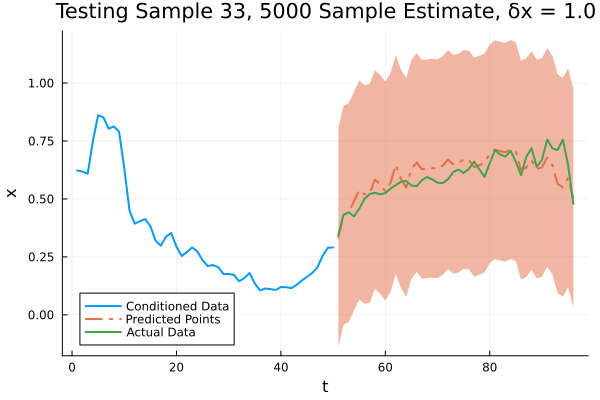

In [129]:
plot(collect(1:50), class_0_test_samples[33,1:50], lw=2, label="Conditioned Data", title="Testing Sample 33, 5000 Sample Estimate, δx = 1.0", legend=:bottomleft)
plot!(collect(51:96), mean(interp_samps5000, dims=1)[1,:], ribbon=std(interp_samps5000, dims=1), label="Predicted Points", ls=:dashdot, lw=2)
plot!(collect(51:96), class_0_test_samples[33, 51:96], label="Actual Data", lw=2)
xlabel!("t")
ylabel!("x")
#savefig("ecg200_class0_sample_33.svg")

In [136]:
findall(x -> x .< 0.2, smapes_all_c1)

8-element Vector{Int64}:
 10
 11
 15
 20
 30
 33
 38
 40

In [130]:
interp_samps5000 = Matrix{Float64}(undef, 5000, 46);
@threads for i in 1:5000
    samp = interpolate_sample(deepcopy(mps1), class_1_test_samples[38,1:50], 51; dx=1.0);
    interp_samps5000[i, :] = samp
end

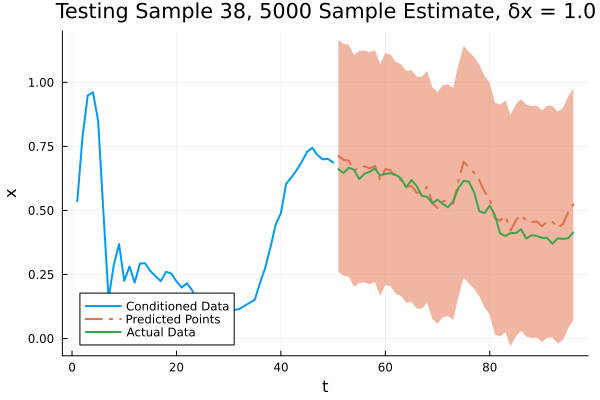

In [134]:
plot(collect(1:50), class_1_test_samples[38,1:50], lw=2, label="Conditioned Data", title="Testing Sample 38, 5000 Sample Estimate, δx = 1.0", legend=:bottomleft)
plot!(collect(51:96), mean(interp_samps5000, dims=1)[1,:], ribbon=std(interp_samps5000, dims=1), label="Predicted Points", ls=:dashdot, lw=2)
plot!(collect(51:96), class_1_test_samples[38, 51:96], label="Actual Data", lw=2)
xlabel!("t")
ylabel!("x")
#savefig("ecg200_class1_sample_38.svg")

In [146]:
interp_samps5000 = Matrix{Float64}(undef, 5000, 46);
@threads for i in 1:5000
    samp = interpolate_sample(deepcopy(mps1), class_1_test_samples[33,1:50], 51; dx=1.0);
    interp_samps5000[i, :] = samp
end

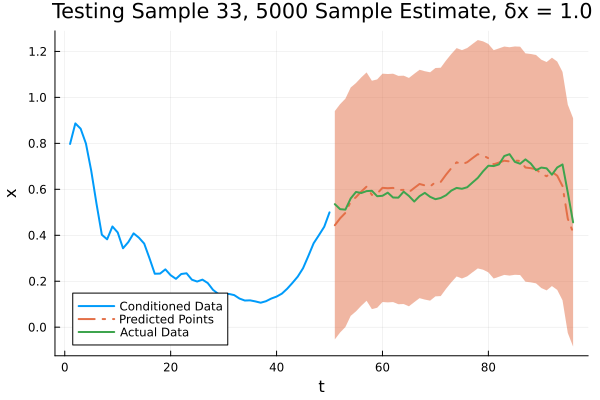

In [149]:
plot(collect(1:50), class_1_test_samples[33,1:50], lw=2, label="Conditioned Data", title="Testing Sample 33, 5000 Sample Estimate, δx = 1.0", legend=:bottomleft)
plot!(collect(51:96), mean(interp_samps5000, dims=1)[1,:], ribbon=std(interp_samps5000, dims=1), label="Predicted Points", ls=:dashdot, lw=2)
plot!(collect(51:96), class_1_test_samples[33, 51:96], label="Actual Data", lw=2)
xlabel!("t")
ylabel!("x")
#savefig("ecg200_class1_sample_33.svg")

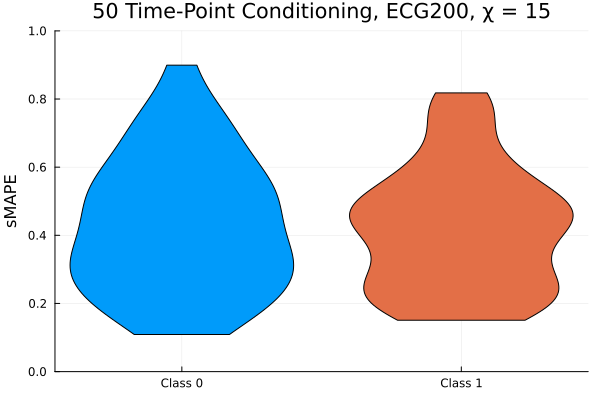

In [102]:
violin(smapes_all_c0, ylabel="sMAPE", label="", ylimit=(0,1))
violin!(smapes_all_c1, label="")
class_names = ["Class 0", "Class 1"]
xticks!(1:2, class_names,)
title!("50 Time-Point Conditioning, ECG200, χ = 15")
#savefig("forecasting_performance_ecg200.svg")

---